In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First let us begin by framing the problem. The task is to identify the fuel consumption of vehicle given its year, make, model and class etc. So this is a multiple regression since the system is using mulitple features to predict the label(Fuel Consumption), and it is also a univariate regression since we are only trying to predict a single value.

In [3]:
PATH = '../data/fuel_train.csv'
data = pd.read_csv(PATH)
print(data.head())


   Year        MAKE         MODEL            VEHICLE CLASS  ENGINE SIZE  \
0  2000  VOLKSWAGEN           GTI                  COMPACT          2.0   
1  2000       DODGE    DAKOTA 4X4  PICKUP TRUCK - STANDARD          4.7   
2  2000         GMC  C1500 SIERRA  PICKUP TRUCK - STANDARD          4.8   
3  2000        FORD      F150 4X4  PICKUP TRUCK - STANDARD          4.6   
4  2000        FORD      F150 4X4  PICKUP TRUCK - STANDARD          4.2   

   CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS   
0          4           M5    X              11.2           228  
1          8           M5    X              18.8           382  
2          8           M5    X              18.9           373  
3          8           A4    X              18.5           380  
4          6           A4    X              17.3           359  


It is evident that we need to encode these cateogorical features, and then check for NaN values, use a method to fill them preferably.  It fills the missing values with the mean of the attribute.(If in case NaN values exist)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              511 non-null    int64  
 1   MAKE              511 non-null    object 
 2   MODEL             511 non-null    object 
 3   VEHICLE CLASS     511 non-null    object 
 4   ENGINE SIZE       511 non-null    float64
 5   CYLINDERS         511 non-null    int64  
 6   TRANSMISSION      511 non-null    object 
 7   FUEL              511 non-null    object 
 8   FUEL CONSUMPTION  511 non-null    float64
 9   COEMISSIONS       511 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 40.0+ KB


It is evident that there are no NaN values.



Top 20 most frequent values in "MAKE":
  CHEVROLET: 48 instances
  FORD: 47 instances
  TOYOTA: 37 instances
  DODGE: 37 instances
  VOLKSWAGEN: 29 instances
  GMC: 29 instances
  BMW: 22 instances
  PONTIAC: 19 instances
  AUDI: 18 instances
  VOLVO: 17 instances
  CHRYSLER: 16 instances
  MAZDA: 16 instances
  NISSAN: 16 instances
  MERCEDES-BENZ: 15 instances
  SATURN: 14 instances
  HONDA: 14 instances
  SUZUKI: 13 instances
  DAEWOO: 9 instances
  SUBARU: 9 instances
  SAAB: 7 instances

Top 20 most frequent values in "MODEL":
  LS: 6 instances
  DAKOTA: 5 instances
  A6 QUATTRO: 5 instances
  626: 4 instances
  A4 QUATTRO: 4 instances
  TACOMA 4X4: 4 instances
  SUNFIRE: 4 instances
  F150: 4 instances
  S10: 4 instances
  NEW BEETLE: 4 instances
  INTREPID: 4 instances
  K1500 SIERRA 4X4: 4 instances
  PASSAT WAGON: 4 instances
  GOLF: 4 instances
  RAM 1500: 4 instances
  K1500 SILVERADO 4X4: 4 instances
  C1500 SIERRA: 4 instances
  F150 4X4: 4 instances
  JETTA: 4 instances


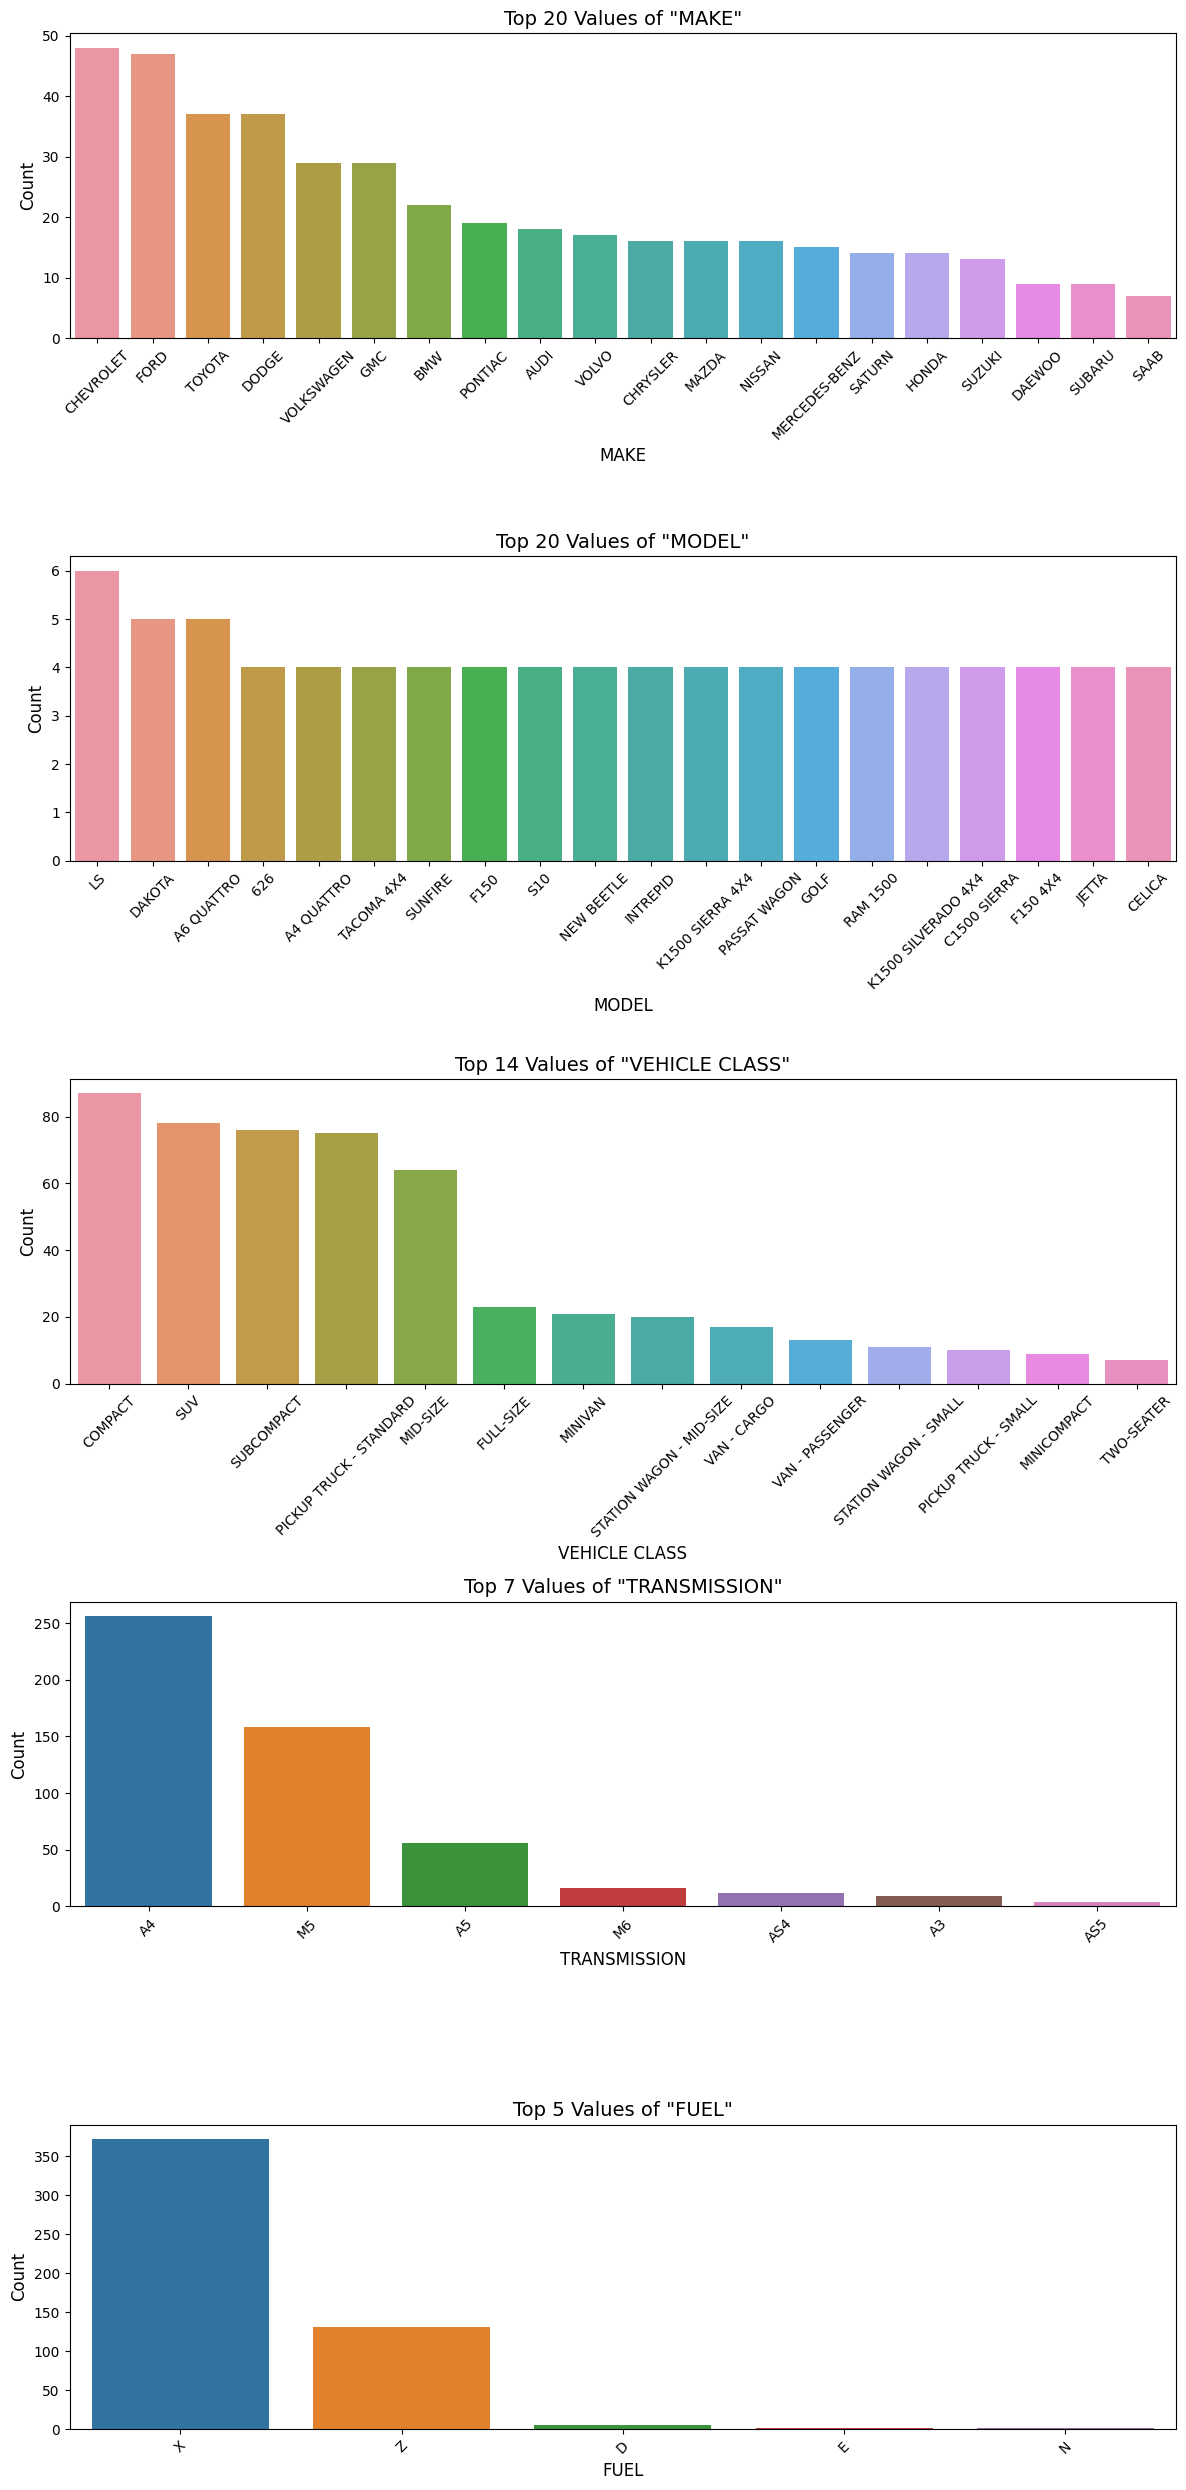

In [9]:
# List of categorical features
cat_features = ['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']

# Set up the figure with subplots for each categorical feature
fig, axes = plt.subplots(len(cat_features), 1, figsize=(12, 5*len(cat_features)), squeeze=False)

# Loop over each categorical feature for printing and plotting
for i, feature in enumerate(cat_features):
    value_counts = data[feature].value_counts()
    
    # Handling case where feature has fewer than 10 unique values
    top_counts = value_counts[:20] if len(value_counts) > 20 else value_counts
    
    # Print summary of the top categories
    print(f'\nTop {len(top_counts)} most frequent values in "{feature}":')
    for category, count in top_counts.items():
        print(f'  {category}: {count} instances')
    
    # Plot the top value counts for the current feature
    sns.barplot(x=top_counts.index, y=top_counts.values, ax=axes[i][0])
    axes[i][0].set_title(f'Top {len(top_counts)} Values of "{feature}"', fontsize=14)
    axes[i][0].set_xlabel(feature, fontsize=12)
    axes[i][0].set_ylabel('Count', fontsize=12)
    axes[i][0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [15]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,511.0,511.000000,511.000000,511.000000,511.000000
mean,2000.0,3.206654,5.726027,14.532485,293.213307
std,0.0,1.194413,1.520864,3.164069,63.158713
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.200000,251.000000
50%,2000.0,3.000000,6.000000,14.200000,283.000000
75%,2000.0,4.000000,6.000000,16.500000,336.000000
max,2000.0,8.000000,12.000000,26.300000,495.000000


One thing to note here is that, 75% of the cars in this data have fuel consumption less than 16.5, 50% of the cars have it less than 14.2. The point being that there is no large difference between the values(the values are not that dispersed)


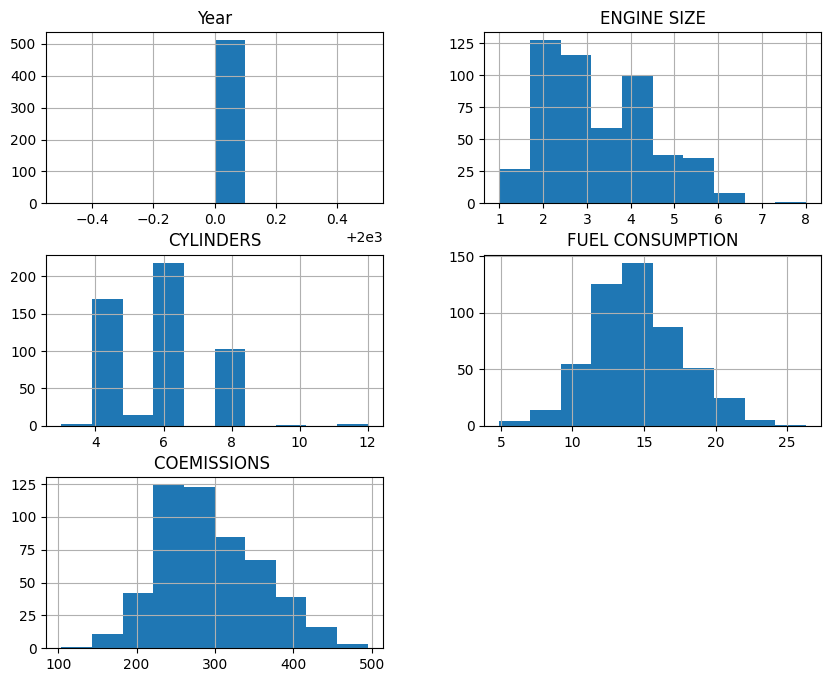

In [16]:
data.hist(figsize=(10, 8))
plt.show()

Key points:

- Diverse feature distributions, predominantly normal
- Varying scales across features
- Presence of multimodal distributions in some features
- Uniform 'year' feature (2000), likely removable from analysis

In [ ]:
#implementation of Spearman from scratch
class Spearman:
    def __init__(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.n = len(x)

        if len(x) != len(y):
            raise ValueError("The arrays must have the same length")

    def calculateD(self):
        x_rank = pd.Series(self.x).rank(ascending=False)
        y_rank = pd.Series(self.y).rank(ascending=False)

        d = x_rank - y_rank

        d_squared = d **2

        numerator = 6 * np.sum(d_squared)
        denominator = self.n * (self.n ** 2 - 1)
        spearman_coeff = 1 - numerator/denominator

        return spearman_coeff



def calculateCorr(x,y):
    if pd.api.types.is_numeric_dtype(x) and pd.api.types.is_numeric_dtype(y):
        spearman = Spearman(x,y)
        return spearman.calculateD()
    
    elif pd.api.types.is_numeric_dtype(x) or pd.api.types.is_numeric_dtype(y):
        categorical, numeric = (y,x) if pd.api.types.is_numeric_dtype(x) else (x,y)
        encoded = Catencode(categorical)
        spearman = Spearman(encoded, numeric)
        return spearman.calculateD()

    else:
        x_encoded = Catencode(x)
        y_encoded = Catencode(y)
        spearman = Spearman(x_encoded, y_encoded)
        return spearman.calculateD()

def plot_correlation_matrix(data, title):
    corr_matrix = data.corr(method=lambda x, y: calculateCorr(x,y))
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(title)
    plt.show()

plot_correlation_matrix(data, "Correlation Matrix including categorical variables")


class TargetEncoder:
    def __init__(self, smoothing_factor = 5, noise_std = 0.001):
        self.smoothing_factor = smoothing_factor  

